In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import math
from queue import PriorityQueue
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [ ]:
#plt.subplot()

In [2]:
def givemedag(v,e,c):
    if e < v-1:
        print('边太少')
        return None
    #e大小要适量
    D = nx.DiGraph()
    leaves=[]
    while(True):
        nx.generators.directed.gn_graph(v-1,kernel = lambda x :x,create_using = D)
        tmp = [x[0] for x in list(D.in_degree()) if x[1] == 0]
        leafnum = len(tmp)
        if D.number_of_edges() + leafnum <= e:
            leaves = tmp.copy()
            break
    #nx.draw(D,with_labels=True)
    
    my_dict = nx.shortest_path_length(nx.reverse_view(D),source=0)
    mylst = list(zip(my_dict.values(), my_dict.keys()))
    #print(my_dict)
    #print(mylst)
    #print(leaves)
    D.add_node(v-1)
    for each in leaves:
        fea = [x[1] for x in mylst if x[0]>my_dict[each]]
        fea.append(v-1)
        D.add_edge(random.choice(fea),each)
    return D.reverse()

In [3]:
def allocation(dag,agentinfo,timelimit):
    basebid = {}
    relativebid = []
    welfare = 0.0
    for e in list(dag.edges):
        agentinfo[e].sort(key = lambda x:x[1])
        basebid[e] = agentinfo[e][0][0]
        nowbid = basebid[e]
        for i in range(len(agentinfo[e])):
            if i > 0 and agentinfo[e][i][0] > nowbid:
                nowbid = agentinfo[e][i][0]
                relativebid.append((agentinfo[e][i][0]-basebid[e],agentinfo[e][i][1],agentinfo[e][i][2],agentinfo[e][i][3]))
        dag.edges[e[0],e[1]]['weight'] = agentinfo[e][0][1]
        welfare = welfare + agentinfo[e][0][0]
    #print(relativebid)
    #if nx.dag_longest_path_length(dag) > timelimit:
    #    print('mission impossible')
    #    return -1
    vis = {}
    relativebid.sort(key = lambda x:x[0])
    while relativebid != []:
        if len(vis) == dag.number_of_edges():
            break
        item = relativebid.pop()
        if item[2] in vis:
            continue
        tmp = dag.edges[item[2][0],item[2][1]]['weight']
        dag.edges[item[2][0],item[2][1]]['weight'] = item[1]
        if nx.dag_longest_path_length(dag) > timelimit:
            dag.edges[item[2][0],item[2][1]]['weight'] = tmp
            continue
        welfare = welfare + item[0]
        vis[item[2]] = True
    return welfare

In [ ]:
def dfs(dag,ind,agentinfo,timelimit,welfare):
    if ind == dag.number_of_edges():
        if nx.dag_longest_path_length(dag) > timelimit:
            return -1
        return welfare
    te=list(dag.edges)[ind]
    ms = 0.0
    for x in agentinfo[te]:
        dag.edges[te[0],te[1]]['weight'] = x[1]
        ms = max(ms,dfs(dag,ind+1,agentinfo,timelimit,welfare+x[0]))
    return ms

In [ ]:
def brute(dag,agent,timelimit):
    agentinfo = agent.copy()
    for e in list(dag.edges):
        agentinfo[e].sort(key = lambda x:x[1]) 
        filt = [agentinfo[e][i] for i in range(len(agentinfo[e]))if i == 0 or agentinfo[e][i][0] > agentinfo[e][i-1][0]]
        agentinfo[e] = filt
    return dfs(dag,0,agentinfo,timelimit,0)

In [4]:
def givemeagent(E, C):
    agents = {}
    for e in E:
        ci = np.random.randint(1,C)
        agents[e]=[]
        for i in range(ci):
            bi = -1
            while bi < 0:
                bi = 1*np.random.randn()+50
            ti = -1
            while ti <0:
                ti = np.random.randint(1,100)
            agents[e].append((bi,ti,e,i))
    return agents

In [5]:
def check(n,C):
    aoe = givemedag(n,1000000000,3)
    assert nx.is_directed_acyclic_graph(aoe)
    #print(aoe.number_of_edges())
    #nx.draw(aoe,with_labels=True)

    es = list(aoe.edges)
    agents = givemeagent(es,C)
    ms = {}
    for e in es:
        agents[e].sort(key = lambda x:x[1])
        nowbid = agents[e][0][0]
        mis = agents[e][0][1]
        mas = agents[e][0][1]
        for i in range(len(agents[e])):
            if i > 0 and agents[e][i][0] > nowbid:
                nowbid = agents[e][i][0]
                mas = agents[e][i][1]
        ms[e] = (mis,mas)
    for e in es:
        aoe.edges[e[0],e[1]]['weight'] = ms[e][0]
    a = nx.dag_longest_path_length(aoe)

    for e in es:
        aoe.edges[e[0],e[1]]['weight'] = ms[e][1]
    b = nx.dag_longest_path_length(aoe)

    tl = np.random.randint(a,b+1)
    
    t0 = time.perf_counter()
    sf = allocation(aoe,agents,tl),
    
    return sf,time.perf_counter()-t0
    #return allocation(aoe,agents,tl),brute(aoe,agents,tl)

In [ ]:
a,b = check(20,3)
print(a,b)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
28

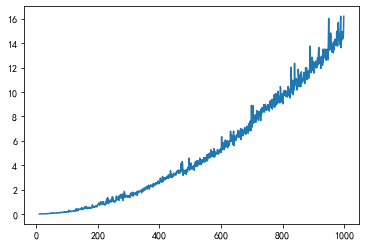

In [6]:
# exetime.pdf
y = []
x = range(10,10**3)
for u in x:
    print(u)
    c,d = check(u,10)
    y.append(d)
plt.plot(x,y)

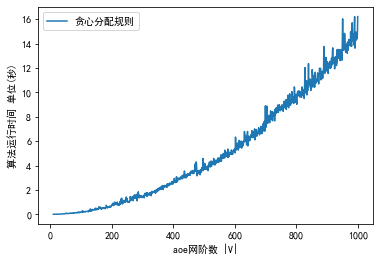

In [8]:
plt.xlabel('aoe网阶数 |V|')
plt.ylabel('算法运行时间 单位(秒)')
plt.plot(x,y,label="贪心分配规则")
plt.legend()
plt.savefig('exetime.pdf')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'x':a,'y':lst})
df.to_csv('exetime10-1000.csv',index=False)

In [ ]:

testn=[10,15,20]
for x in testn:
    ratiolist = []
    cnt = 0
    for i in range(1000):
        print(i)
        a,b = check(x,3)
        if math.fabs(a-b) < 1e-8:
            cnt=cnt+1
        ratiolist.append(a/b)
        
        #print("a/b=%lf"%(a/b))
    print(cnt,np.median(ratiolist),np.mean(ratiolist),np.std(ratiolist,ddof=1))


In [ ]:
998 1.0 0.9999980277131707 5.478483267317938e-05

994 1.0 0.999998769926064 1.8107295551290027e-05
992 1.0 0.9999979986019756 2.9445272088786218e-05


In [ ]:
print(cnt,np.median(ratiolist),np.mean(ratiolist),np.std(ratiolist,ddof=1))

In [ ]:
len(ratiolist)

In [ ]:
x = range(10,10**3)

In [ ]:
y1 = [i*(5*np.random.randn()+50)for i in x]

In [ ]:
y2 = [i*(5*np.random.randn()+60)for i in x]

In [ ]:
plt.plot(x,y1,label='SW maximization')
plt.plot(x,y2,label='optimal auction')
plt.legend(loc="upper left")

In [ ]:
plt.show()

In [ ]:
def reweight(dag,agentinfo):
    for e in list(dag.edges):
        dag.edges[e[0],e[1]]['weight'] = agentinfo[e][0][1]

In [ ]:
def allocation2(dag,agentinfo,timelimit):
    #basebid = {}
    relativebid = [(agentinfo[e][i][0]-agentinfo[e][0][0],agentinfo[e][i][1],agentinfo[e][i][2],agentinfo[e][i][3])for e in list(dag.edges)for i in range(1,len(agentinfo[e]))]
    #print('#')
    #print(relativebid)
    #print('#')
    ansdict = {}
    reweight(dag,agentinfo)
    for e in list(dag.edges):
        #dag.edges[e[0],e[1]]['weight'] = agentinfo[e][0][1]
        ansdict[e] = 0
    #print(relativebid)
    #if nx.dag_longest_path_length(dag) > timelimit:
    #    print('mission impossible')
    #    return -1
    vis = {}
    relativebid.sort(key = lambda x:x[0])
    while relativebid != []:
        if len(vis) == dag.number_of_edges():
            break
        item = relativebid.pop()
        #print('$')
        #print(item)
        if item[2] in vis:
            continue
        tmp = dag.edges[item[2][0],item[2][1]]['weight']
        dag.edges[item[2][0],item[2][1]]['weight'] = item[1]
        if nx.dag_longest_path_length(dag) > timelimit:
            dag.edges[item[2][0],item[2][1]]['weight'] = tmp
            continue
        vis[item[2]] = True
        #print(e)
        #print(item[3])
        ansdict[item[2]] = item[3]
    return ansdict

In [ ]:
def init(dag,agentinfo):
    for e in list(dag.edges):
        agentinfo[e].sort(key=lambda x:x[0],reverse=True)
        agentinfo[e].sort(key = lambda x:x[1]) 
        nowbid = agentinfo[e][0][0]
        tmp = [(agentinfo[e][0][0],agentinfo[e][0][1],agentinfo[e][0][2],0)]
        for i in range(1,len(agentinfo[e])):
            if agentinfo[e][i][0] > nowbid:
                nowbid = agentinfo[e][i][0]
                lens = len(tmp)
                tmp.append((agentinfo[e][i][0],agentinfo[e][i][1],agentinfo[e][i][2],lens))
        agentinfo[e] = tmp

In [ ]:
def graphseq(dag,agentinfo,e,ind,relativebid,timelimit):
    reweight(dag,agentinfo)
    #cong tou qu 
    relativebid.sort(key = lambda x:x[0])
    vis = {}
    if ind > 0:
        sign = False
        addon = agentinfo[e][ind-1][0]-agentinfo[e][0][0]
        
        while relativebid != []:
            item = relativebid.pop()
            if item[2] in vis:
                continue
            if item[2] == e:
                if item[0] <= addon:
                    break
                else:
                    if item[3] == ind:
                        sign=True
                    continue
            tmp = dag.edges[item[2][0],item[2][1]]['weight']
            dag.edges[item[2][0],item[2][1]]['weight'] = item[1]
            if nx.dag_longest_path_length(dag) > timelimit:
                dag.edges[item[2][0],item[2][1]]['weight'] = tmp
                continue
            vis[item[2]] = True
            if sign:
                dag.edges[e[0],e[1]]['weight'] = agentinfo[e][ind][1]
                if nx.dag_longest_path_length(dag) > timelimit:
                    addon = max(addon,item[0])
                    break
                dag.edges[e[0],e[1]]['weight'] = agentinfo[e][0][1]
        #print(e,1,addon+agentinfo[e][0][0])
        return addon+agentinfo[e][0][0]
    else:
        if len(agentinfo[e]) == 1:
            #print(e,0,0)
            return 0
        graphs=[dag.copy()]
        bids=[0]
        que = PriorityQueue()
        while relativebid != []:
            item = relativebid.pop()
            if item[0] < agentinfo[e][1][0]:
                break
            if item[2] in vis:
                continue
            if item[2] == e:
                pre = len(bids)-1
                if pre > 0:
                    que.put((bids[pre]-item[0],pre,item[3]))
                continue
            tmp = dag.edges[item[2][0],item[2][1]]['weight']
            dag.edges[item[2][0],item[2][1]]['weight'] = item[1]
            if nx.dag_longest_path_length(dag) > timelimit:
                dag.edges[item[2][0],item[2][1]]['weight'] = tmp
                continue
            vis[item[2]] = True
            graphs.append(dag.copy())
            bids.append(item[0])
        acc = 0 #crucial
        addons = -1
        while not que.empty():
            front = que.get()
            if front[1] >= 1:
                delta = bids[front[1]]-(agentinfo[e][front[2]][0] + acc)
                acc = acc + delta
                if acc >= agentinfo[e][0][0]:
                    break
                newdist = max(0,bids[front[1]-1]-bids[front[1]])+ delta
                que.put((newdist,front[1]-1,front[2]))
            prepos = front[1]
            myind = front[2]
            graphs[prepos].edges[e[0],e[1]]['weight'] = agentinfo[e][myind][1]
            if nx.dag_longest_path_length(graphs[prepos]) <= timelimit: 
                addons = bids[prepos+1]-agentinfo[e][myind][0]
                break
            graphs[prepos].edges[e[0],e[1]]['weight'] = agentinfo[e][0][1]
        if addons == -1:
            #print(e,0,0)
            return 0
        #print(e,0,agentinfo[e][0][0]-addons)
        return agentinfo[e][0][0]-addons

In [ ]:
def payment(dag,agentinfo,timelimit):
    
    relativebid = [(agentinfo[e][i][0]-agentinfo[e][0][0],agentinfo[e][i][1],agentinfo[e][i][2],agentinfo[e][i][3])for e in list(dag.edges)for i in range(1,len(agentinfo[e]))]
    allo = allocation2(dag,agentinfo,timelimit)
    #print(allo)
    ans = 0.0
    for e in list(dag.edges):
        ans = ans + graphseq(dag,agentinfo,e,allo[e],relativebid,timelimit)
    #print(ans)
    return ans

In [ ]:
def checkpay(n,C):
    #n=200
    #C=3
    aoe = givemedag(n,1000000000,3)
    assert nx.is_directed_acyclic_graph(aoe)
    #print(aoe.number_of_edges())
    #nx.draw(aoe,with_labels=True)
    es = list(aoe.edges)
    agents = givemeagent(es,C)
    init(aoe,agents)
    #print(agents)
    ms = {}
    for e in es:
        ms[e] = (agents[e][0][1],agents[e][len(agents[e])-1][1])
    for e in es:
        aoe.edges[e[0],e[1]]['weight'] = ms[e][0]
    a = nx.dag_longest_path_length(aoe)

    for e in es:
        aoe.edges[e[0],e[1]]['weight'] = ms[e][1]
    b = nx.dag_longest_path_length(aoe)
    #print(a,b)
    tl = np.random.randint(a,b+1)
    #payment(aoe,agents,tl)
    return payment(aoe,agents,tl)


In [ ]:
#print(tl)
#payment(aoe,agents,tl)

In [ ]:
#allo = allocation2(aoe,agents,tl)

In [ ]:
#print(allo)

In [ ]:
checkpay(1000,100)

In [ ]:
y = []
x = range(10,200)
for u in x:
    print(u)
    y.append(checkpay(u,100))
#y=[checkpay(u,100)for u in x]

plt.plot(x,y)

In [ ]:
plt.xlabel('$|V|$')
plt.ylabel('revenue')

plt.plot(x,y,label="SW Maximization")
#plt.plot(x,y2,label="optimal auction")
plt.legend()
#plt.savefig('revenuevsv.pdf')
plt.show()

In [ ]:
y2=[]
for u in y:
    up = np.random.randint(1,11)
    if up >= 3:
        y2.append(u*(1+np.random.randint(10,20)*0.01))
    else:
        y2.append(u*(1-np.random.randint(1,10)*0.01))
plt.xlabel('aoe网阶数 |V|')
plt.ylabel('税收 Revenue')

plt.plot(x,y,label="社会福利最大",linestyle=':')
plt.plot(x,y2,label="期望税收最大")
plt.legend()
plt.savefig('SWandoptimal.pdf')
plt.show()

In [ ]:
x = range(10,1000)
yz=[]
for u in y:
    if len(yz) == 990:
        break
    a = u/8000
    yz.append(a)
    for k in range(5):
        if len(yz) == 990:
            break
        yz.append(np.random.normal(a))

y1 = [np.random.normal(float(u**2),scale = 1e4)/1e8 for u in x]
y2 = [np.random.normal(float(u)/2*1e8,scale = 1e5)/1e8 for u in x]
y3 = [np.random.normal(1e10+float(u)/2*1e8,scale = 1e3)/1e8 for u in x]
#for u in yz:
 #   u*np.random.normal

plt.xlabel('$n$')
plt.ylabel('time in secs')

plt.plot(x,y1,label="greedy")
plt.plot(x,y2,label="multi index")
plt.plot(x,y3,label="orgs extension")

plt.legend()
plt.savefig('greedytimes.pdf')
#plt.show()

In [ ]:
plt.xlabel('参与者的数量 n')
plt.ylabel('参与者k的效用 $utility_k$')
x = [10,100,200,300,400,500]
y1=[63.1,57.332,18.654,17.98,0,0]
plt.scatter(x,y1,label="$utility_k$",marker='*',color='red')
#plt.plot(x,y2,label = "multi index")
#plt.plot(x,y3,label = "orgs extension")
plt.legend()
plt.savefig('utility.pdf')
#plt.show()

In [ ]:
plt.xlabel('$|V|$')
plt.ylabel('execution time in seconds')
plt.plot(x,y,label="SW maximization")

plt.savefig('exetime.pdf')
plt.show()

In [ ]:
def newtons(f,df,x0,e):
    xn = float(x0)
    e_tmp = e+1
    loop = 1
    while e_tmp>e:
        print '########loop'+str(loop)
        k = df(xn)
        xm = f(xn)
        print 'xn='+str(xn)+',k='+str(k)+',y='+str(xm)
        q = xm/k
        xn = xn-q
        e_tmp = abs(0-f(xn))
        print 'new xn='+str(xn)+',e='+str(e_tmp)+',q='+str(q)
        loop=loop+1
    return xn  

In [ ]:
x = np.linspace(0,2,200)
z = np.zeros(100)
o = np.ones(100)
y = np.concatenate([z,o])
plt.xlabel('z')
plt.ylabel('x(z)')
plt.xticks([])
plt.plot(x,y)
plt.savefig('jieyuefenpei.pdf')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1)
from scipy.stats import norm
x = np.linspace(norm.ppf(0.001),
                norm.ppf(0.999), 100)
ax.plot(x, x-(1-norm.cdf(x)/norm.pdf(x)),
       'r-', lw=5, alpha=0.6, label='norm pdf')